In [13]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
import joblib

In [2]:
# Read data
# X: features, y: labels
features = pd.read_csv("../JeuDeDonnees/alt_acsincome_ca_features_85(1).csv")
labels = pd.read_csv("../JeuDeDonnees/alt_acsincome_ca_labels_85.csv")  

In [ ]:
# Print content
print("DATABASE 1")
print(features.head())
print(features.columns)

# Delete missing values - NULL, If 'MAR' or 'COW' contain NULL values 
features['AGEP'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Nb de personnes')
plt.show()
# Limpiar los datos eliminando filas con valores nulos en 'MAR' y 'COW'
features_df = features.dropna(subset=['MAR', 'COW'])

# Create relation between 'MAR' and 'COW' 
features_relation = features_df.groupby(['MAR', 'COW']).size().reset_index(name='QUANTITÉ')
print(features_relation)

# Create Graphic
plt.figure(figsize=(10, 6))
sns.barplot(data=features_relation, x='MAR', y='QUANTITÉ', hue='COW', palette='viridis')
plt.title('Relation entre MAR (État Civil) et COW (Occupation)')
plt.xlabel('MAR (État Civil)')
plt.ylabel('QUANTITÉ PERSONNES')
plt.legend(title='COW (Occupation)')
plt.show()

print("")
print("DATABASE 2")
# print(labels.head())  # Show first lines from the dataset
print(labels.columns)   # Show all the columns on the dataset

In [3]:
print("\n-----------------------------")
print("    SHUFFLE AND DIVIDED DATA   ")
print("-----------------------------\n")
# Shuffle and Divide data
X_train, X_test, y_train, y_test = train_test_split(
    features,           # X_train - X_test Características (features)
    labels.values.ravel(),             # y_train - y_test  (labels)
    test_size=0.2,      # Size test set (20%)
    random_state=42,    # Para reproducibilidad
    shuffle=False       # Mix data TRUE
)

print("\nSize TRAINING set:", X_train.shape)
print("TRAINING set:")
print(X_train) # Print Results

print("\nSize TEST set:", X_test.shape, "\n")
print("TEST set:")
print(X_test) # Print Results

# To standaliser the datas
my_scaler = StandardScaler()
X_train_Standed = my_scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
X_test_Standed = my_scaler.fit_transform(X_test.select_dtypes(include=['float64','int64']))
joblib.dump (my_scaler, 'my_scaler.joblib')

# from sklearn.utils import shuffle
datos_shuffled = shuffle(features)


-----------------------------
    SHUFFLE AND DIVIDED DATA   
-----------------------------


Size TRAINING set: (133052, 10)
TRAINING set:
        AGEP  COW  SCHL  MAR    OCCP   POBP  RELP  WKHP  SEX  RAC1P
0       41.0  4.0  24.0  1.0  2555.0    6.0   1.0  60.0  2.0    1.0
1       77.0  7.0  22.0  1.0  4920.0   39.0   0.0  35.0  1.0    1.0
2       38.0  1.0  18.0  1.0   440.0    6.0   1.0  50.0  1.0    1.0
3       30.0  1.0  22.0  5.0  1555.0    6.0   2.0  80.0  1.0    6.0
4       36.0  1.0  16.0  1.0  4030.0  314.0   1.0  70.0  2.0    1.0
...      ...  ...   ...  ...     ...    ...   ...   ...  ...    ...
133047  47.0  1.0  18.0  1.0  5240.0   47.0   0.0  40.0  2.0    2.0
133048  23.0  1.0  18.0  5.0  4720.0    6.0  13.0  30.0  2.0    1.0
133049  18.0  1.0  16.0  5.0  4220.0    6.0   2.0  10.0  1.0    8.0
133050  41.0  1.0  21.0  1.0  4850.0   29.0   1.0  30.0  1.0    1.0
133051  51.0  1.0  19.0  1.0  1010.0    6.0  15.0  40.0  1.0    1.0

[133052 rows x 10 columns]

Size TEST set:

In [ ]:
#SVM
# Validation Croisée
svm_model = SVC(kernel='linear')
scores = cross_val_score(svm_model,X_train,y_train,cv=5).mean()

# Accuracy & Classification report & Confusion matrix
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Grid Search for best parameters
param_grid = {'C': [0.1, 1, 10, 20], 'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

print("best_params = ", best_params)

In [20]:
# Models to be tested with params by default
models = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

In [5]:
# Cross-validation and initial metrics
for name, model in models.items():
    print(f"Training {name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Accuracy average (Cross-Validation): {np.mean(scores):.4f}")
    
    # Train and evaluate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 40)

Training RandomForest...
Accuracy average (Cross Validation): 0.8126
Accuracy on test set: 0.8173
Classification report:
              precision    recall  f1-score   support

       False       0.84      0.86      0.85     19774
        True       0.78      0.76      0.77     13489

    accuracy                           0.82     33263
   macro avg       0.81      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
[[16933  2841]
 [ 3236 10253]]
----------------------------------------
Training AdaBoost...
Accuracy average (Cross Validation): 0.8042
Accuracy on test set: 0.8083
Classification report:
              precision    recall  f1-score   support

       False       0.83      0.85      0.84     19774
        True       0.77      0.75      0.76     13489

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:


In [4]:
models2 = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
}

In [ ]:
# Hyperparameters for each model
param_grids = {
    "RandomForest": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]},
    "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]},
    "GradientBoosting": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]},
    "SVM": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
}

# Optimize each model
best_models = {}
for name, model in models.items():
    print(f"Optimización de hyperparameters for {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    
    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Best Accuracy (Cross-validation): {grid.best_score_:.4f}")

Optimización de hyperparameters for RandomForest...
Best Parameters for RandomForest: {'max_depth': 20, 'n_estimators': 200}
Best Accuracy (Cross-validation): 0.8179
Optimización de hyperparameters for AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best Accuracy (Cross-validation): 0.8091
Optimización de hyperparameters for GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 1, 'n_estimators': 200}
Best Accuracy (Cross-validation): 0.8229
Optimización de hyperparameters for SVM...


In [40]:
# Training SVM with the results of the base models.
# Training Models with the best hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_depth=20)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=1)
ab = AdaBoostClassifier(n_estimators=200, learning_rate=1)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ab.fit(X_train, y_train)

best_models["RandomForest"] = rf
best_models["GradientBoosting"] = gb
best_models["AdaBoost"] = ab

# Generate predictions as features for the SVM - Train set
rf_preds = rf.predict_proba(X_train)[:, 1]
gb_preds = gb.predict_proba(X_train)[:, 1]
ab_preds = ab.predict_proba(X_train)[:, 1]

X_train_stack = np.column_stack((rf_preds, gb_preds, ab_preds))

# Generate predictions as features for the SVM - Test set
rf_preds_test = rf.predict_proba(X_test)[:, 1]
gb_preds_test = gb.predict_proba(X_test)[:, 1]
ab_preds_test = ab.predict_proba(X_test)[:, 1]

X_test_stack = np.column_stack((rf_preds_test, gb_preds_test, ab_preds_test))

# Training SVM lineal as meta-model
svm = LinearSVC(C=1, max_iter=10000, random_state=42)
svm.fit(X_train_stack, y_train)

# Add this model to the best models
best_models["SVM_Stacking"] = svm

# Evaluation
y_pred = svm.predict(X_test_stack)
print(f"Evaluation of the optimized model: SVM")
print("Stacking model accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save Model
filename = f"SVM_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
joblib.dump(model, filename)
print(f"Model saved as: {filename}")

Evaluation of the optimized model: SVM
Stacking model accuracy with SVM: 0.7939452244235337
Classification report:
              precision    recall  f1-score   support

       False       0.81      0.85      0.83     19774
        True       0.76      0.72      0.74     13489

    accuracy                           0.79     33263
   macro avg       0.79      0.78      0.78     33263
weighted avg       0.79      0.79      0.79     33263

Confusion Matrix:
[[16737  3037]
 [ 3817  9672]]
Model saved as: SVM_BestModel_07939.joblib


In [28]:
print("Content BestModels")
for name, model in best_models.items():
    print(f"{name}: {model}")

Content BestModels
RandomForest: RandomForestClassifier(max_depth=20, n_estimators=200)
AdaBoost: AdaBoostClassifier(learning_rate=1, n_estimators=200)
GradientBoosting: GradientBoostingClassifier(learning_rate=1, n_estimators=200)


In [29]:
# Evaluate and save the best models
for name, model in best_models.items():
    print(f"Evaluation of the optimized model: {name}")
    y_pred = model.predict(X_test)
    
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Saved Model
    filename = f"{name}_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
    joblib.dump(model, filename)
    print(f"Model saved as: {filename}")

Evaluation of the optimized model: RandomForest
Accuracy on test set: 0.8233
Classification report:
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     19774
        True       0.79      0.77      0.78     13489

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
[[16943  2831]
 [ 3048 10441]]
Model saved as: RandomForest_BestModel_08233.joblib
Evaluation of the optimized model: AdaBoost
Accuracy on test set: 0.8134
Classification report:
              precision    recall  f1-score   support

       False       0.84      0.85      0.84     19774
        True       0.78      0.76      0.77     13489

    accuracy                           0.81     33263
   macro avg       0.81      0.80      0.81     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
[[16813  2961]
 [ 3247 10242]]


In [7]:
# Hyperparameters for each model
param_grids = {
    "RandomForest": {"n_estimators": [300, 400, 500], "max_depth": [15, 20, 25]},
    "AdaBoost": {"n_estimators": [300, 400, 500], "learning_rate": [0.5, 1, 1.2]},
    "GradientBoosting": {"n_estimators": [300, 400, 500], "learning_rate": [0.05, 0.5, 1]}
}

# Optimize each model
best_models = {}
for name, model in models2.items():
    print(f"Hyperparameter optimization for {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best accuracy (cross-validation): {grid.best_score_:.4f}")


Hyperparameter optimization for RandomForest...
Best parameters for RandomForest: {'max_depth': 15, 'n_estimators': 400}
Best accuracy (cross-validation): 0.8183
Hyperparameter optimization for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1.2, 'n_estimators': 500}
Best accuracy (cross-validation): 0.8148
Hyperparameter optimization for GradientBoosting...
Best parameters for GradientBoosting: {'learning_rate': 0.5, 'n_estimators': 400}
Best accuracy (cross-validation): 0.8256


In [41]:
# Training SVM with the results of the base models.
# Training Models with the best hyperparameters
rf = RandomForestClassifier(n_estimators=400, max_depth=15)
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=1.2)
ab = AdaBoostClassifier(n_estimators=400, learning_rate=0.5)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
ab.fit(X_train, y_train)

best_models["RandomForest"] = rf
best_models["GradientBoosting"] = gb
best_models["AdaBoost"] = ab

# Generate predictions as features for the SVM - Train set
rf_preds = rf.predict_proba(X_train)[:, 1]
gb_preds = gb.predict_proba(X_train)[:, 1]
ab_preds = ab.predict_proba(X_train)[:, 1]

X_train_stack = np.column_stack((rf_preds, gb_preds, ab_preds))

# Generate predictions as features for the SVM - Test set
rf_preds_test = rf.predict_proba(X_test)[:, 1]
gb_preds_test = gb.predict_proba(X_test)[:, 1]
ab_preds_test = ab.predict_proba(X_test)[:, 1]

X_test_stack = np.column_stack((rf_preds_test, gb_preds_test, ab_preds_test))

# Training SVM lineal as meta-model
svm = LinearSVC(C=1, max_iter=10000, random_state=42)
svm.fit(X_train_stack, y_train)

# Evaluation
y_pred = svm.predict(X_test_stack)
print(f"Evaluation of the optimized model: SVM")
print("Stacking model accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save Model
filename = f"SVM_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
joblib.dump(model, filename)
print(f"Model saved as: {filename}")

Evaluation of the optimized model: SVM
Stacking model accuracy with SVM: 0.8148393109460963
Classification report:
              precision    recall  f1-score   support

       False       0.83      0.86      0.85     19774
        True       0.78      0.75      0.77     13489

    accuracy                           0.81     33263
   macro avg       0.81      0.80      0.81     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
[[16987  2787]
 [ 3372 10117]]
Model saved as: SVM_BestModel_08148.joblib


In [45]:
print("Content BestModels")
for name, model in best_models.items():
    print(f"{name}: {model}")

Content BestModels
RandomForest: RandomForestClassifier(max_depth=15, n_estimators=400)
AdaBoost: AdaBoostClassifier(learning_rate=0.5, n_estimators=400)
GradientBoosting: GradientBoostingClassifier(learning_rate=1.2, n_estimators=500)


In [46]:
# Evaluate and save the best models
for name, model in best_models.items():
    print(f"Evaluation of the optimized model: {name}")
    y_pred = model.predict(X_test)
    
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Save Model
    filename = f"{name}_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
    joblib.dump(model, filename)
    print(f"Model saved as: {filename}")

Evaluation of the optimized model: RandomForest
Accuracy on test set: 0.8235
Classification report:
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     19774
        True       0.79      0.78      0.78     13489

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
[[16910  2864]
 [ 3008 10481]]
Model saved as: RandomForest_BestModel_08235.joblib
Evaluation of the optimized model: AdaBoost
Accuracy on test set: 0.8110
Classification report:
              precision    recall  f1-score   support

       False       0.83      0.85      0.84     19774
        True       0.78      0.75      0.76     13489

    accuracy                           0.81     33263
   macro avg       0.80      0.80      0.80     33263
weighted avg       0.81      0.81      0.81     33263

Confusion Matrix:
[[16872  2902]
 [ 3385 10104]]


In [52]:
# Hyperparameters for each model
param_grids = {
    "RandomForest": {"n_estimators": [200, 400, 600], "max_depth": [15, 20, 30], "min_samples_split": [2, 5]},
    "AdaBoost": {"n_estimators": [200, 500, 600], "learning_rate": [0.8, 1, 1.2], "estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)]},
    "GradientBoosting": {"n_estimators": [200, 400, 600], "learning_rate": [0.05, 0.5, 1], "max_depth": [3, 5]},
}

# Optimize each model
best_models = {}
for name, model in models2.items():
    print(f"Optimización de hyperparameters for {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    
    print(f"Best Parameters for {name}: {grid.best_params_}")
    print(f"Best Accuracy (Cross-validation): {grid.best_score_:.4f}")

Optimización de hyperparameters for RandomForest...
Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 600}
Best Accuracy (Cross-validation): 0.8191


Optimización de hyperparameters for AdaBoost...
Best Parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 1.2, 'n_estimators': 600}
Best Accuracy (Cross-validation): 0.8190


Optimización de hiperparámetros para GradientBoosting...
Mejores parámetros para GradientBoosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 600}
Mejor precisión (validación cruzada): 0.8267


In [5]:
# Training SVM with the results of the base models.
# Training Models with the best hyperparameters
rf = RandomForestClassifier(n_estimators=600, max_depth=20, min_samples_split= 5)
gb = GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, max_depth= 5)
ab = AdaBoostClassifier(n_estimators=600, learning_rate=1.2, estimator= DecisionTreeClassifier(max_depth=2))

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
ab.fit(X_train, y_train)
y_pred_ab = gb.predict(X_test)

NameError: name 'best_models' is not defined

In [8]:
best_models = {}

best_models["RandomForest"] = rf
best_models["GradientBoosting"] = gb
best_models["AdaBoost"] = ab

In [11]:
# Generate predictions as features for the SVM - Train set
rf_preds = rf.predict_proba(X_train)[:, 1]
gb_preds = gb.predict_proba(X_train)[:, 1]
ab_preds = ab.predict_proba(X_train)[:, 1]

X_train_stack = np.column_stack((rf_preds, gb_preds, ab_preds))

# Generate predictions as features for the SVM - Test set
rf_preds_test = rf.predict_proba(X_test)[:, 1]
gb_preds_test = gb.predict_proba(X_test)[:, 1]
ab_preds_test = ab.predict_proba(X_test)[:, 1]

X_test_stack = np.column_stack((rf_preds_test, gb_preds_test, ab_preds_test))

# Training SVM lineal as meta-model
svm = LinearSVC(C=1, max_iter=10000, random_state=42)
svm.fit(X_train_stack, y_train)

# Evaluation
y_pred = svm.predict(X_test_stack)
print(f"Evaluation of the optimized model: SVM")
print("Stacking model accuracy with SVM:", accuracy_score(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save Model
filename = f"SVM_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
joblib.dump(model, filename)
print(f"Model saved as: {filename}")

Evaluation of the optimized model: SVM
Stacking model accuracy with SVM: 0.7871208249406247
Classification report:
              precision    recall  f1-score   support

       False       0.81      0.83      0.82     19774
        True       0.75      0.72      0.73     13489

    accuracy                           0.79     33263
   macro avg       0.78      0.78      0.78     33263
weighted avg       0.79      0.79      0.79     33263

Confusion Matrix:
[[16480  3294]
 [ 3787  9702]]
Model saved as: SVM_BestModel_07871.joblib


In [9]:
print("Content BestModels")
for name, model in best_models.items():
    print(f"{name}: {model}")

Content BestModels
RandomForest: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=600)
GradientBoosting: GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=600)
AdaBoost: AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1.2, n_estimators=600)


In [56]:
# Evaluate and save the best models
for name, model in best_models.items():
    print(f"Evaluation of the optimized model: {name}")
    y_pred = model.predict(X_test)
    
    print(f"Accuracy on test set: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Save Model
    filename = f"{name}_BestModel_{accuracy_score(y_test, y_pred):.4f}".replace(".", "") + ".joblib"
    joblib.dump(model, filename)
    print(f"Model saved as: {filename}")

Evaluation of the optimized model: AdaBoost
Accuracy on test set: 0.8213
Classification report:
              precision    recall  f1-score   support

       False       0.85      0.85      0.85     19774
        True       0.78      0.77      0.78     13489

    accuracy                           0.82     33263
   macro avg       0.82      0.81      0.81     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
[[16897  2877]
 [ 3067 10422]]
Model saved as: AdaBoost_BestModel_08213.joblib
Evaluation of the optimized model: RandomForest
Accuracy on test set: 0.8243
Classification report:
              precision    recall  f1-score   support

       False       0.85      0.86      0.85     19774
        True       0.79      0.77      0.78     13489

    accuracy                           0.82     33263
   macro avg       0.82      0.82      0.82     33263
weighted avg       0.82      0.82      0.82     33263

Confusion Matrix:
[[16969  2805]
 [ 3039 10450]]
Mode

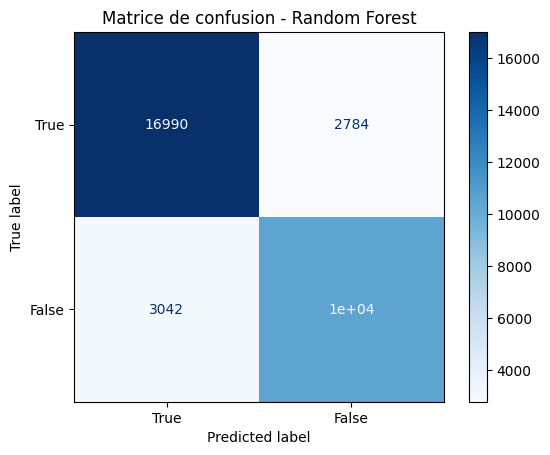

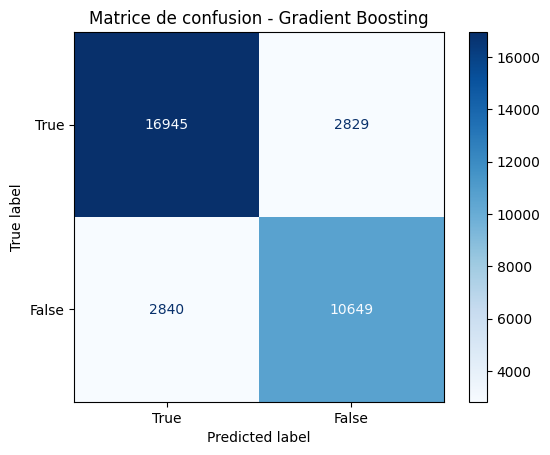

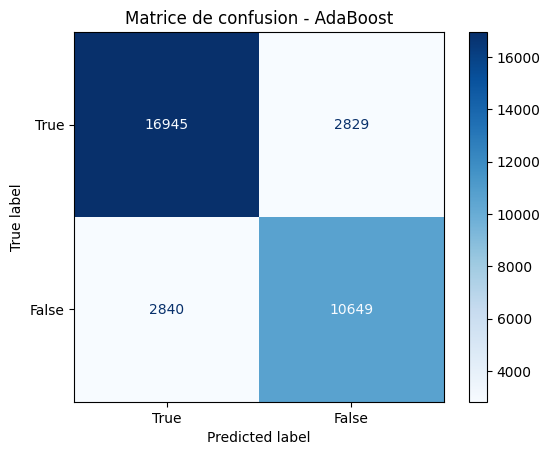

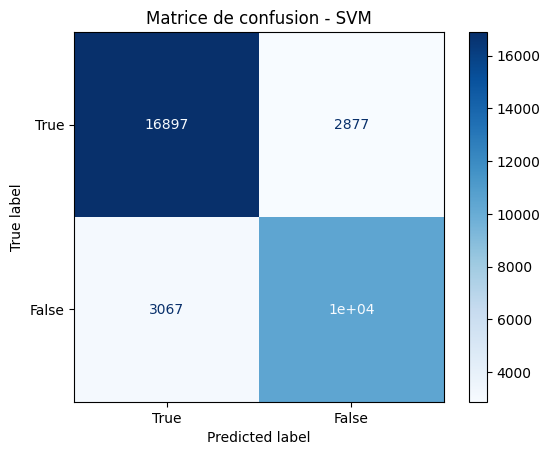

In [30]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["True", "False"]).plot(cmap="Blues")
plt.title("Matrice de confusion - Random Forest")

# Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
ConfusionMatrixDisplay(cm_gb, display_labels=["True", "False"]).plot(cmap="Blues")
plt.title("Matrice de confusion - Gradient Boosting")
plt.show()

# Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_ab)
ConfusionMatrixDisplay(cm_gb, display_labels=["True", "False"]).plot(cmap="Blues")
plt.title("Matrice de confusion - AdaBoost")
plt.show()

# SVM 
cm_gb = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm_gb, display_labels=["True", "False"]).plot(cmap="Blues")
plt.title("Matrice de confusion - SVM")
plt.show()

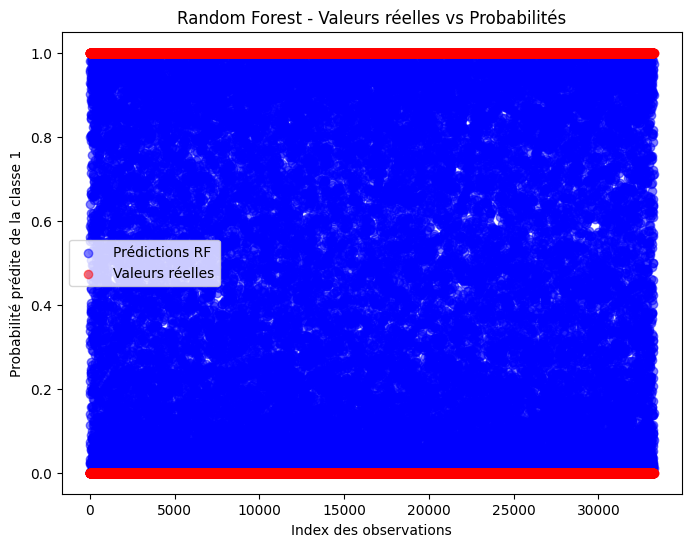

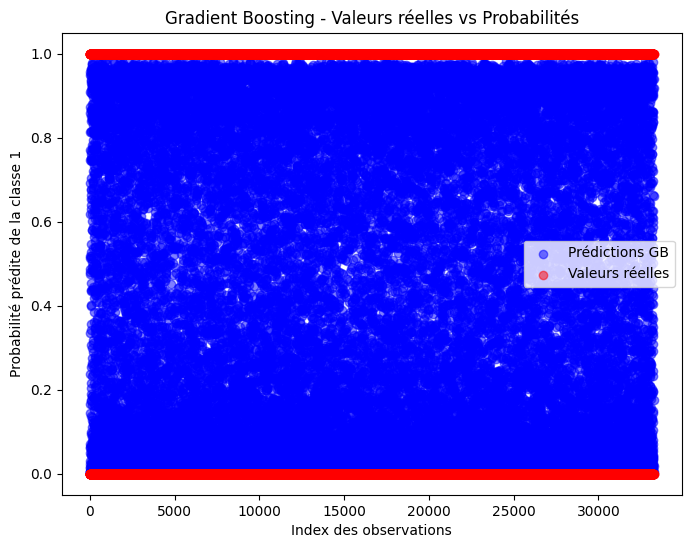

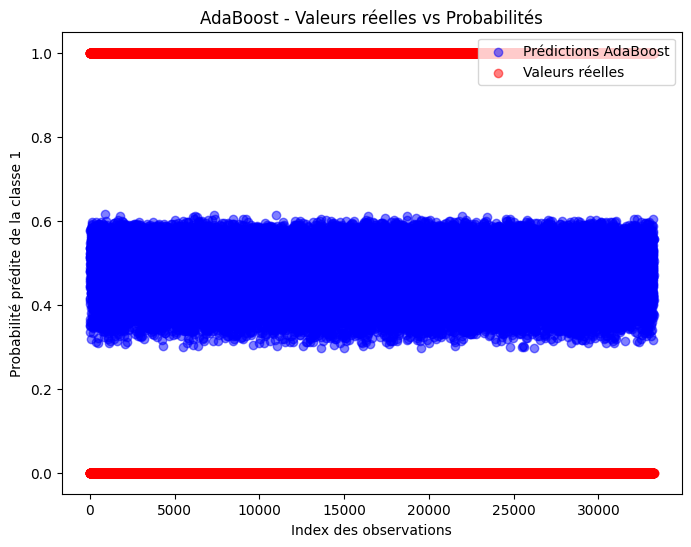

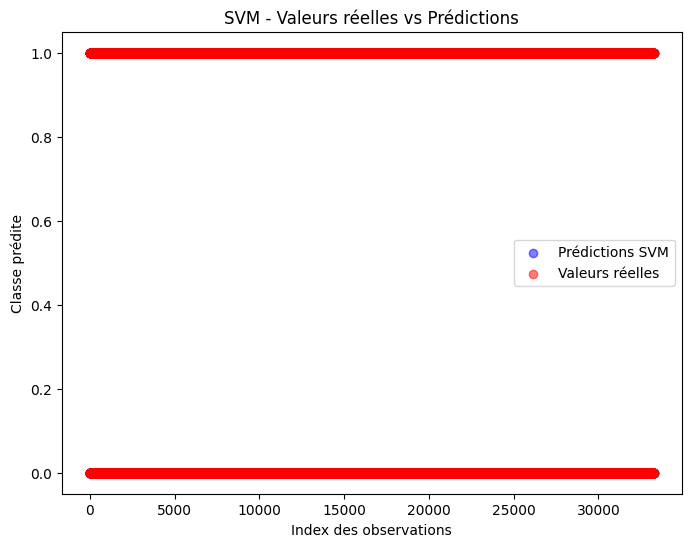

In [17]:
# Random Forest
plt.figure(figsize=(8, 6))
y_proba_rf = rf.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1
plt.scatter(range(len(y_test)), y_proba_rf, alpha=0.5, color='blue', label='Prédictions RF')
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='red', label='Valeurs réelles')
plt.title("Random Forest - Valeurs réelles vs Probabilités")
plt.xlabel("Index des observations")
plt.ylabel("Probabilité prédite de la classe 1")
plt.legend()
plt.show()

# Gradient Boosting
plt.figure(figsize=(8, 6))
y_proba_gb = gb.predict_proba(X_test)[:, 1]
plt.scatter(range(len(y_test)), y_proba_gb, alpha=0.5, color='blue', label='Prédictions GB')
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='red', label='Valeurs réelles')
plt.title("Gradient Boosting - Valeurs réelles vs Probabilités")
plt.xlabel("Index des observations")
plt.ylabel("Probabilité prédite de la classe 1")
plt.legend()
plt.show()

# AdaBoost
plt.figure(figsize=(8, 6))
y_proba_ab = ab.predict_proba(X_test)[:, 1]
plt.scatter(range(len(y_test)), y_proba_ab, alpha=0.5, color='blue', label='Prédictions AdaBoost')
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='red', label='Valeurs réelles')
plt.title("AdaBoost - Valeurs réelles vs Probabilités")
plt.xlabel("Index des observations")
plt.ylabel("Probabilité prédite de la classe 1")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_pred, alpha=0.5, color='blue', label='Prédictions SVM')
plt.scatter(range(len(y_test)), y_test, alpha=0.5, color='red', label='Valeurs réelles')
plt.title("SVM - Valeurs réelles vs Prédictions")
plt.xlabel("Index des observations")
plt.ylabel("Classe prédite")
plt.legend()
plt.show()

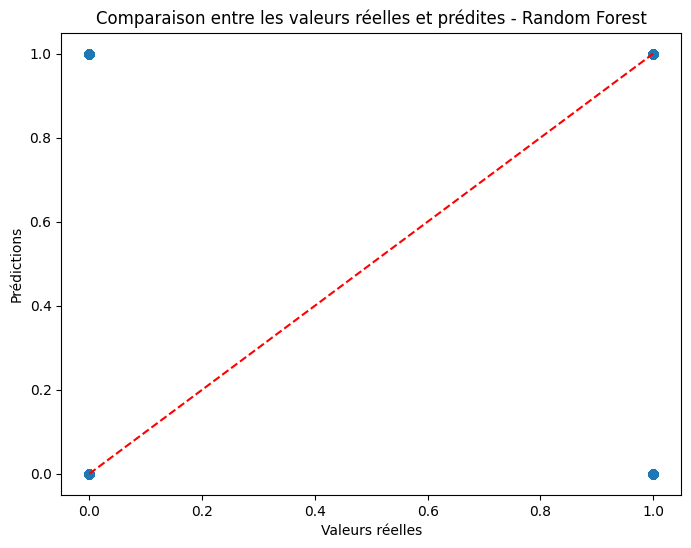

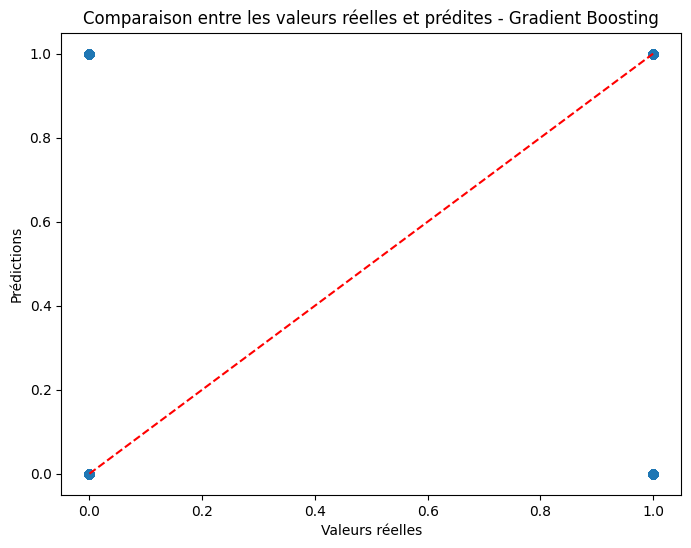

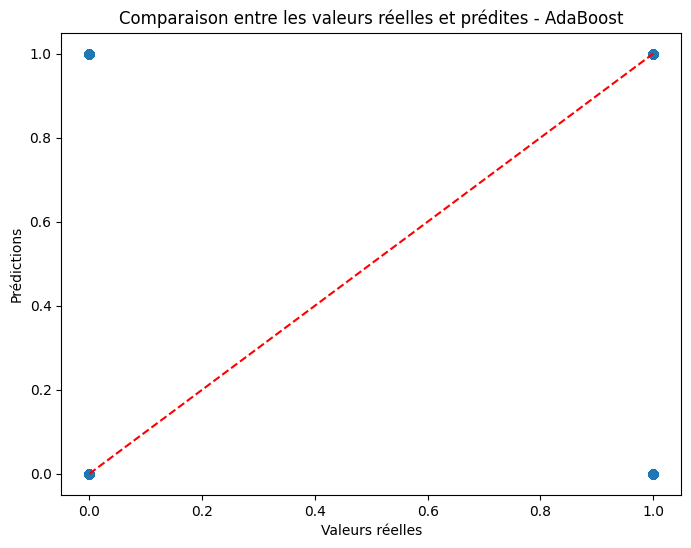

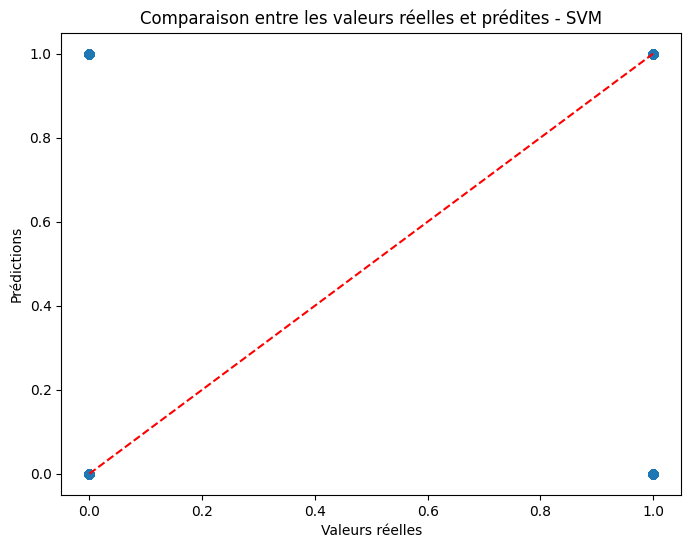

In [15]:
# Random Forest
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison entre les valeurs réelles et prédites - Random Forest")
plt.show()

# Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison entre les valeurs réelles et prédites - Gradient Boosting")
plt.show()


# AdaBoost
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ab, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison entre les valeurs réelles et prédites - AdaBoost")
plt.show()

# SVM 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Comparaison entre les valeurs réelles et prédites - SVM")
plt.show()

In [ ]:


#Forest 

rf_model = RandomForestClassifier()
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5).mean()
print("validation croisée average score = ", cv_scores_rf)


rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)


param_grid_rf = {'n_estimators': [50, 100, 120],'criterion':['gini','entropy','log_loss'],'max_depth': [None, 10, 20],'min_samples_split':[0.1, 1.0, 2]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_




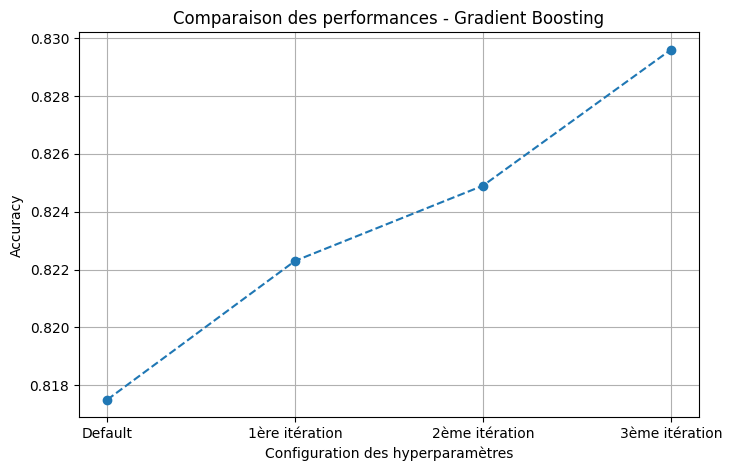

In [2]:
import matplotlib.pyplot as plt

# Résultats d'accuracy
iterations = ["Default", "1ère itération", "2ème itération", "3ème itération"]
accuracies = [0.8175, 0.8223, 0.8249, 0.8296]

plt.figure(figsize=(8, 5))
plt.plot(iterations, accuracies, marker='o', linestyle='--')
plt.title("Comparaison des performances - Gradient Boosting")
plt.xlabel("Configuration des hyperparamètres")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

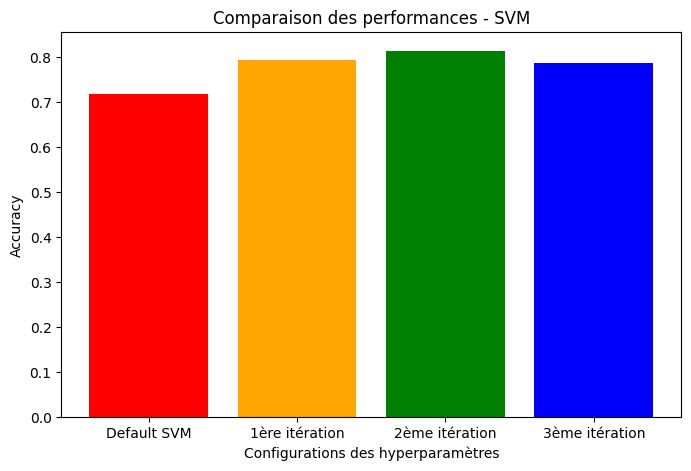

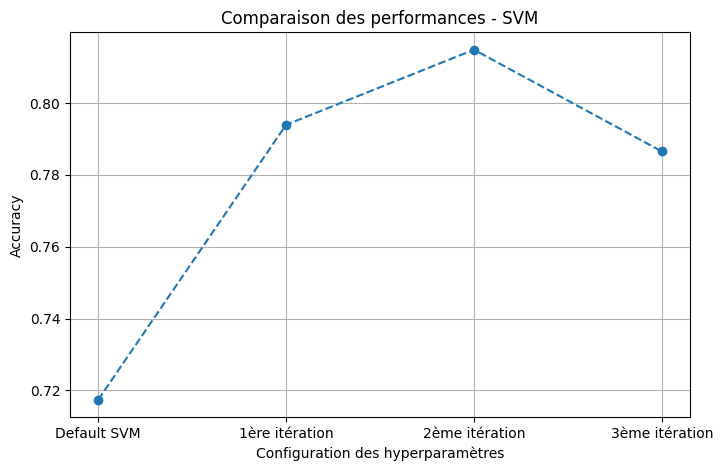

In [8]:
models = ["Default SVM", "1ère itération", "2ème itération", "3ème itération"]
accuracies = [0.7174, 0.7939, 0.8148, 0.7865]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["red", "orange", "green", "blue"])
plt.title("Comparaison des performances - SVM")
plt.xlabel("Configurations des hyperparamètres")
plt.ylabel("Accuracy")
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='--')
plt.title("Comparaison des performances - SVM")
plt.xlabel("Configuration des hyperparamètres")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

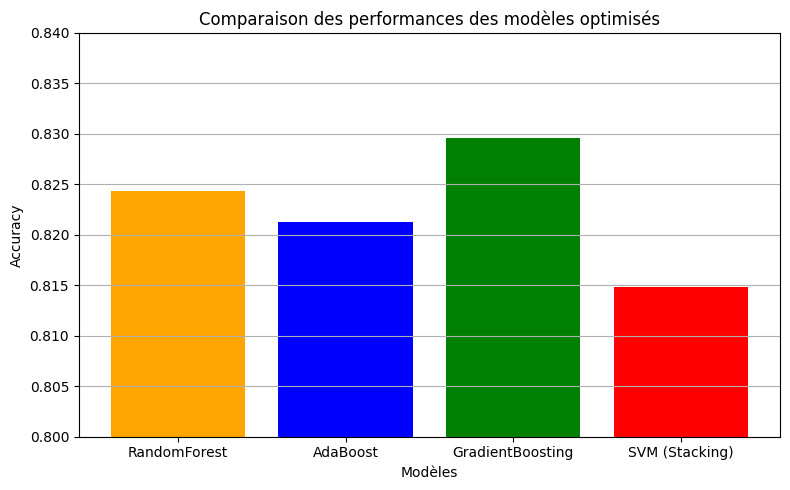

In [9]:
import matplotlib.pyplot as plt

# Datos de los modelos
models = ["RandomForest", "AdaBoost", "GradientBoosting", "SVM (Stacking)"]
accuracies = [0.8243, 0.8213, 0.8296, 0.8148]

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=["orange", "blue", "green", "red"])
plt.title("Comparaison des performances des modèles optimisés")
plt.xlabel("Modèles")
plt.ylabel("Accuracy")
plt.ylim(0.8, 0.84)  # Ajuste del eje Y para mayor claridad
plt.grid(axis="y")
plt.tight_layout()

# Guardar el gráfico
plt.savefig("comparative_models.png")
plt.show()

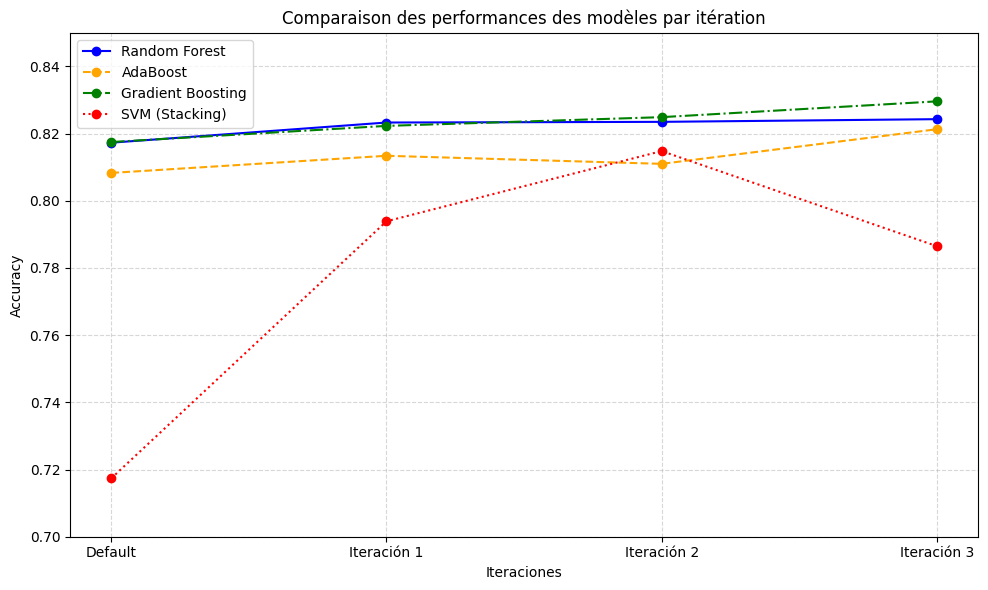

In [10]:
import matplotlib.pyplot as plt

# Datos de las iteraciones
iterations = ["Default", "Iteración 1", "Iteración 2", "Iteración 3"]

# Accuracy por modelo en cada iteración
random_forest_acc = [0.8173, 0.8233, 0.8235, 0.8243]
adaboost_acc = [0.8083, 0.8134, 0.8110, 0.8213]
gradient_boosting_acc = [0.8175, 0.8223, 0.8249, 0.8296]
svm_acc = [0.7174, 0.7939, 0.8148, 0.7865]

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Trazar las líneas para cada modelo
plt.plot(iterations, random_forest_acc, marker='o', label="Random Forest", linestyle='-', color='blue')
plt.plot(iterations, adaboost_acc, marker='o', label="AdaBoost", linestyle='--', color='orange')
plt.plot(iterations, gradient_boosting_acc, marker='o', label="Gradient Boosting", linestyle='-.', color='green')
plt.plot(iterations, svm_acc, marker='o', label="SVM (Stacking)", linestyle=':', color='red')

# Personalización del gráfico
plt.title("Comparaison des performances des modèles par itération")
plt.xlabel("Iteraciones")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.85)  # Rango del eje Y
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()

# Guardar la figura
plt.savefig("model_comparison_iterations.png")
plt.show()

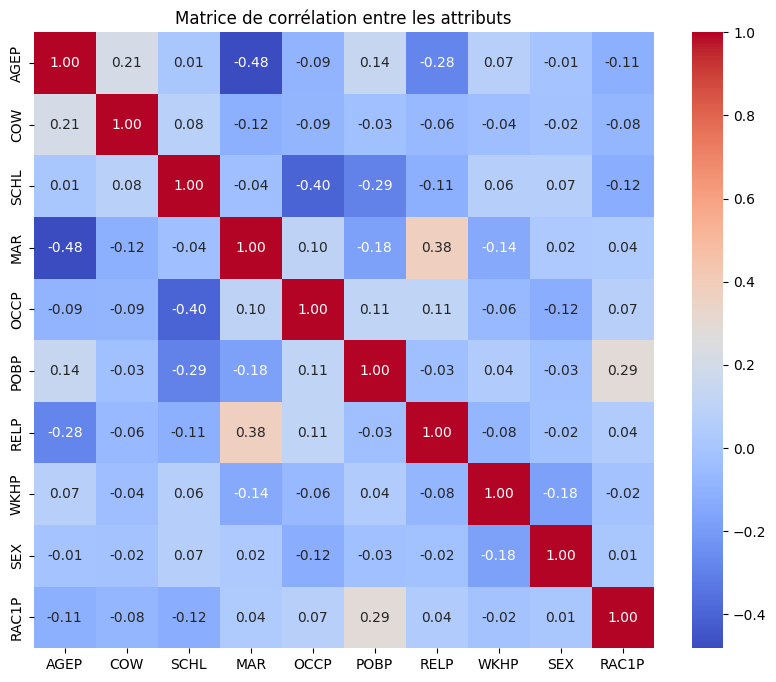

Correlations avec le label:
SCHL     0.350690
WKHP     0.338617
AGEP     0.264232
COW      0.050349
POBP    -0.086359
RAC1P   -0.102881
SEX     -0.117716
RELP    -0.227146
MAR     -0.264506
OCCP    -0.343039
dtype: float64


In [9]:
import pandas as pd

# Verificar si X_train es un numpy.ndarray
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f"Feature_{i}" for i in range(X_train.shape[1])])

# Convertir y_train si es un numpy array
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train, name="Target")

# Correlación de los atributos con la variable objetivo
# target_correlation = X_train.corrwith(y_train)
# print("Correlations avec le label:")
# print(target_correlation.sort_values(ascending=False))

# Calcular la matriz de correlación
correlation_matrix = X_train.corr()  # Correlación entre los atributos
target_correlation = X_train.corrwith(y_train)  # Correlación entre cada atributo y el label

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation entre les attributs")
plt.show()

# Mostrar correlación con el label
print("Correlations avec le label:")
print(target_correlation.sort_values(ascending=False))

In [12]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Diccionario de modelos a evaluar
models = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Entrenamiento de los modelos
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

Training RandomForest...
Training AdaBoost...
Training GradientBoosting...
Training SVM...


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# Diccionario de modelos a evaluar
models = {
    "RandomForest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

# Entrenamiento de los modelos
trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model

# Obtener y graficar la importancia de las características
for name, model in trained_models.items():
    print(f"Processing feature importance for {name}...")
    
    # Verifica si el modelo tiene 'feature_importances_'
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        features = X_train.columns
        
        # Gráfico de barras horizontales
        plt.figure(figsize=(8, 6))
        plt.barh(features, importances, color='skyblue')
        plt.title(f"Feature Importance - {name}")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.gca().invert_yaxis()
        plt.show()
        
    # Para modelos como SVM, calcula permutation_importance
    elif name == "SVM":
        print(f"Calculating permutation importance for {name}...")
        result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
        importances = result.importances_mean
        features = X_train.columns
        
        # Gráfico de barras horizontales
        plt.figure(figsize=(8, 6))
        plt.barh(features, importances, color='lightcoral')
        plt.title(f"Permutation Importance - {name}")
        plt.xlabel("Importance")
        plt.ylabel("Features")
        plt.gca().invert_yaxis()
        plt.show()
        
    else:
        print(f"{name} does not support feature importances.")

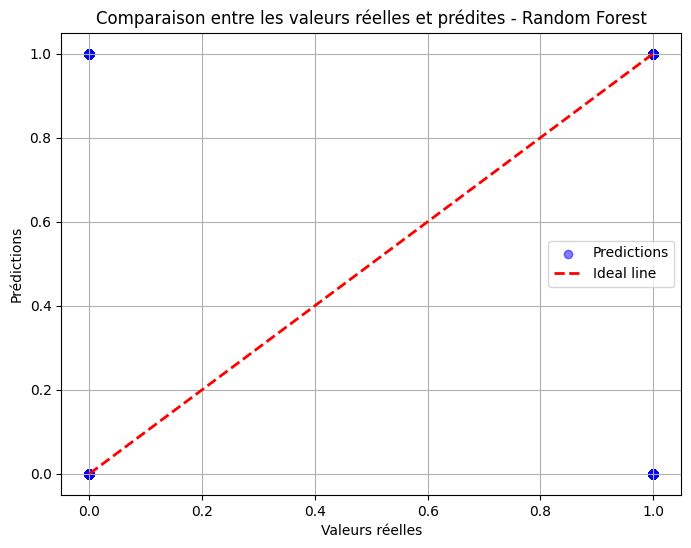

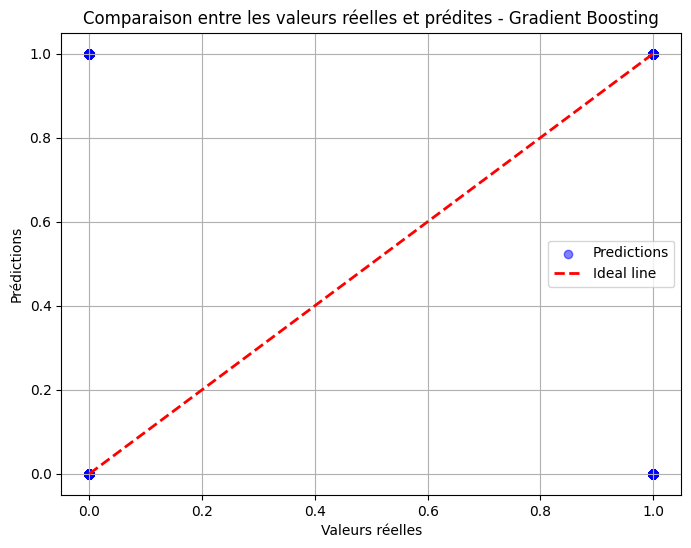

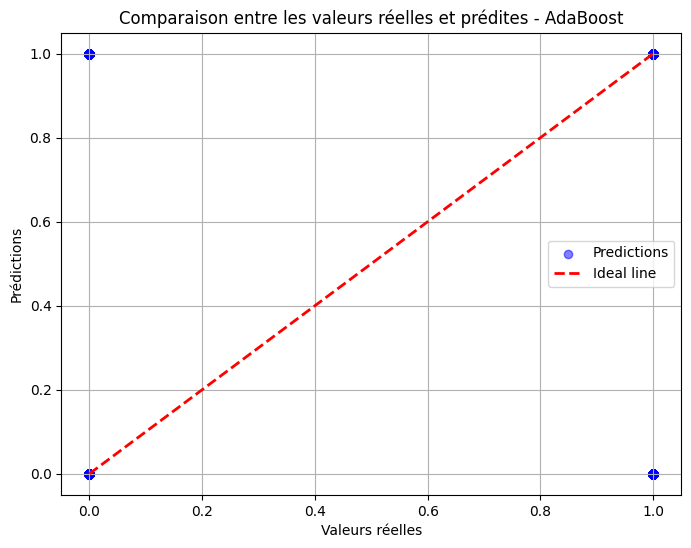

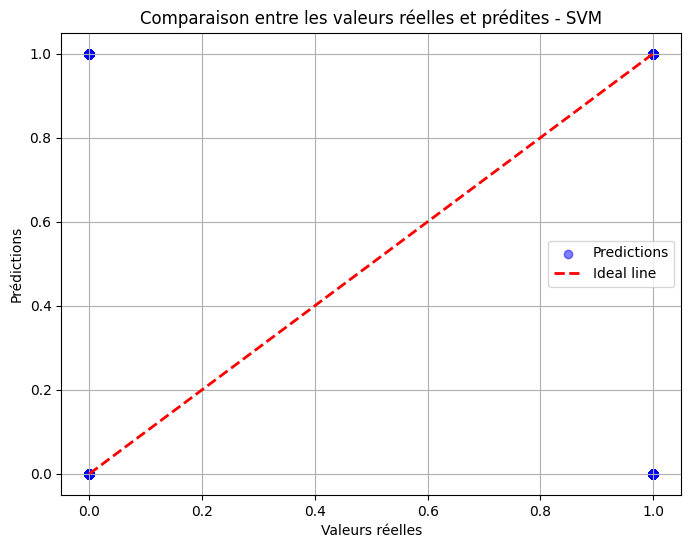

In [29]:
# Diccionario con los nombres y predicciones de cada modelo
predictions = {
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "AdaBoost": y_pred_ab,
    "SVM": y_pred  # Si tienes el SVM como modelo final
}

# Crear gráficos de residuos para cada modelo
for model_name, y_pred in predictions.items():
    # Valores reales y predicciones
    y_pred = model.predict(X_test)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal line')
    
    plt.title(f"Comparaison entre les valeurs réelles et prédites - {model_name}")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Prédictions")
    plt.legend()
    plt.grid(True)
    plt.show()

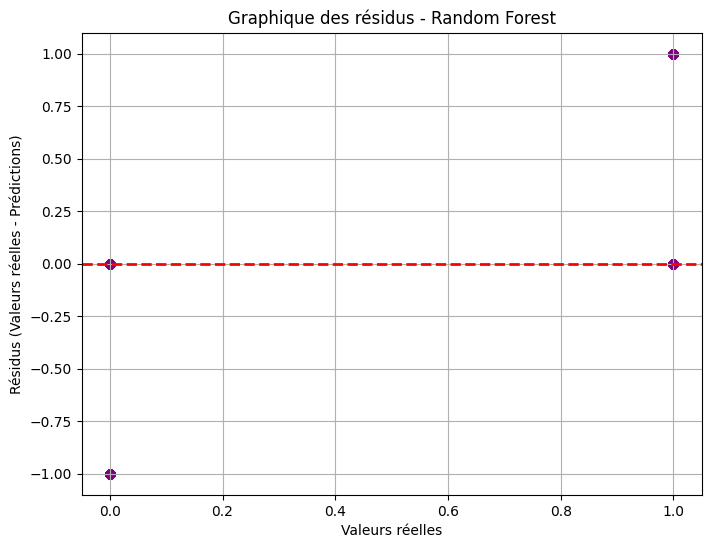

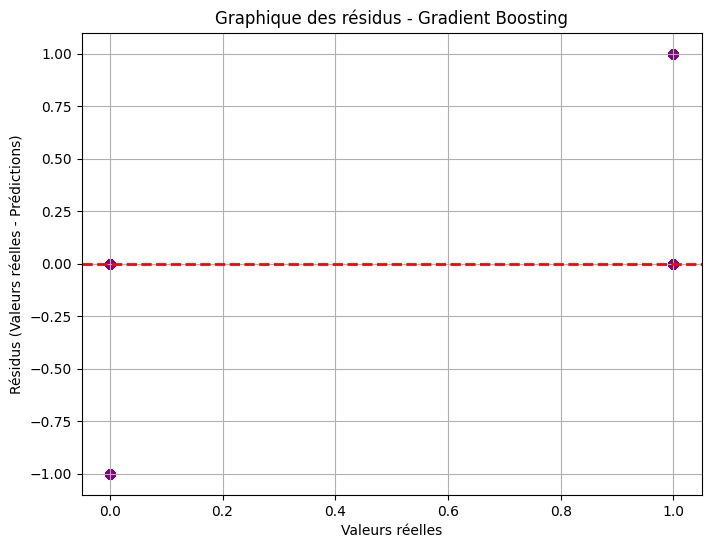

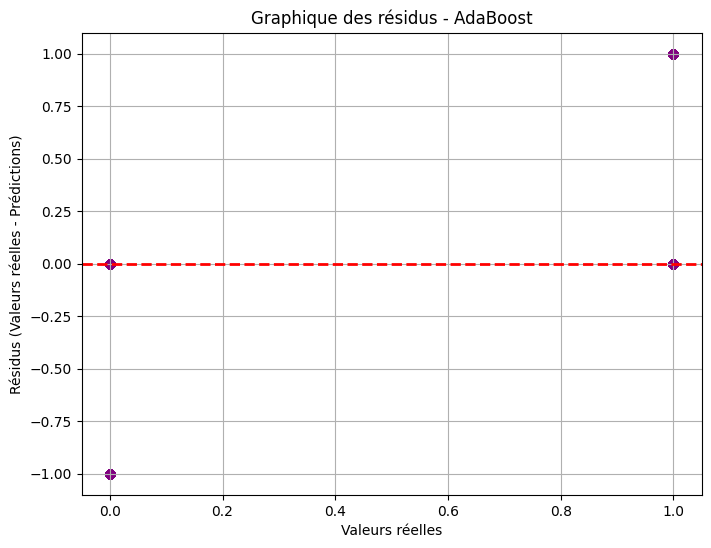

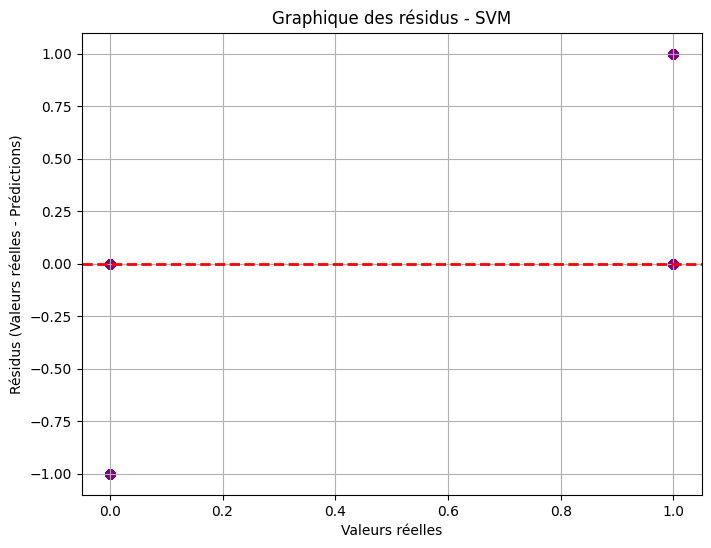

In [28]:
import matplotlib.pyplot as plt

# Diccionario con los nombres y predicciones de cada modelo
predictions = {
    "Random Forest": y_pred_rf,
    "Gradient Boosting": y_pred_gb,
    "AdaBoost": y_pred_ab,
    "SVM": y_pred  # Si tienes el SVM como modelo final
}

# Crear gráficos de residuos para cada modelo
for model_name, y_pred in predictions.items():
    # Convertir a enteros para evitar errores
    y_test_int = y_test.astype(int)
    y_pred_int = y_pred.astype(int)
    
    # Calcular errores residuales
    residuals = y_test_int - y_pred_int
    
    # Graficar
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test_int, residuals, alpha=0.5, color='purple')
    plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Línea de referencia en y=0
    
    plt.title(f"Graphique des résidus - {model_name}")
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Résidus (Valeurs réelles - Prédictions)")
    plt.grid(True)
    plt.show()

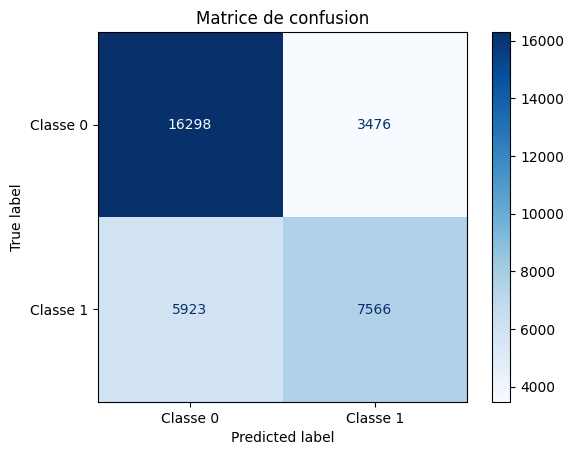

In [17]:


# Generar matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()